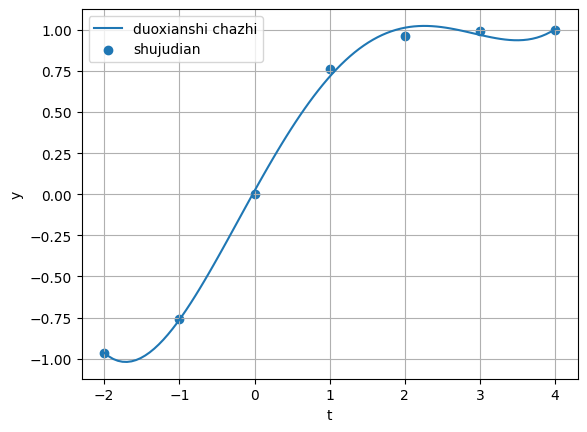

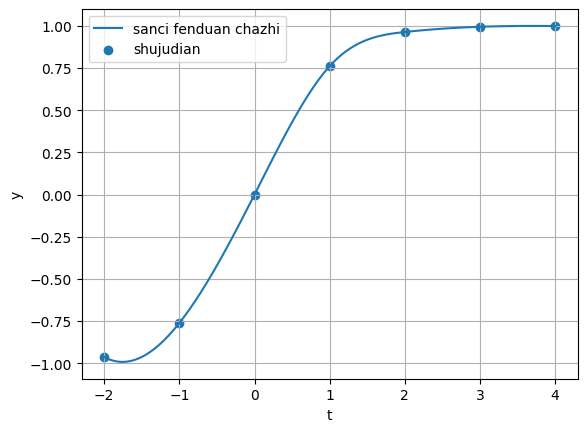

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

t = [i for i in range(-2, 5)]
y = np.tanh(t)
# 多项式插值
fun = np.polyfit(t, y, 4)
func = np.poly1d(fun)
# 绘图
t1 = np.linspace(-2, 4, 100)
y1 = func(t1)
plt.plot(t1, y1, label="duoxianshi chazhi")
plt.scatter(t, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
# 三次分段插值
fun = CubicSpline(t, y)
t2 = np.linspace(-2, 4, 100)
y2 = fun(t2)
# 绘图
plt.plot(t2, y2, label="sanci fenduan chazhi")
plt.scatter(t, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


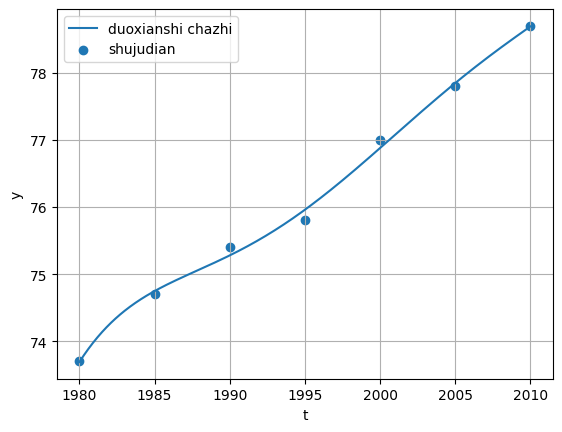

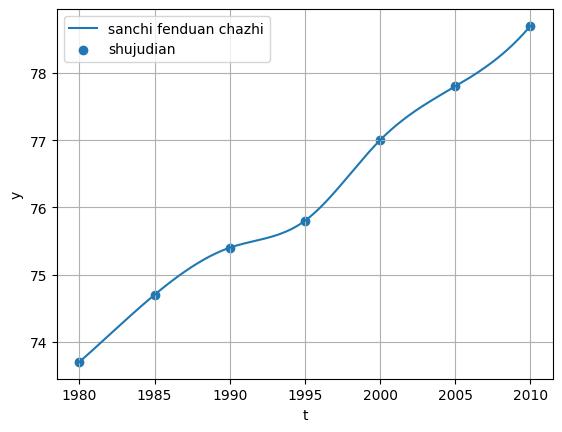

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# 多项式插值
t = [i for i in range(1980, 2015, 5)]
y = np.array([73.7, 74.7, 75.4, 75.8, 77.0, 77.8, 78.7])
fun = np.polyfit(t, y, 5)
func = np.poly1d(fun)
t1 = np.linspace(1980, 2010, 500)
y1 = func(t1)
plt.plot(t1, y1, label="duoxianshi chazhi")
plt.scatter(t, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
# 分段三次插值
fun = CubicSpline(t, y)
t2 = np.linspace(1980, 2010, 500)
y2 = fun(t2)
plt.plot(t2, y2, label="sanchi fenduan chazhi")
plt.scatter(t, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


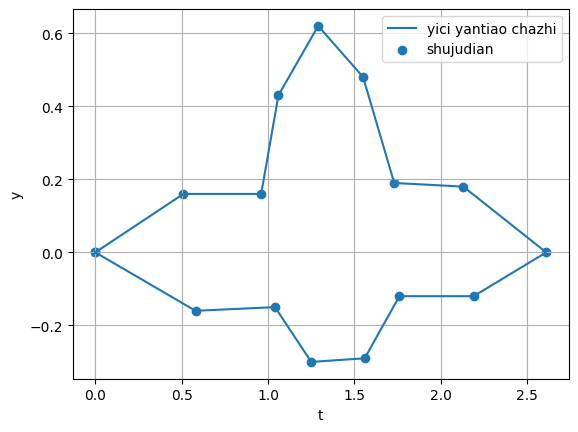

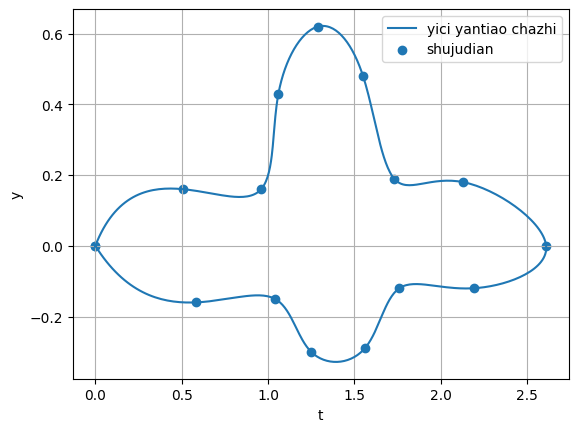

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d

x = [
    0,
    0.51,
    0.96,
    1.06,
    1.29,
    1.55,
    1.73,
    2.13,
    2.61,
    2.19,
    1.76,
    1.56,
    1.25,
    1.04,
    0.58,
    0,
]
y = [
    0,
    0.16,
    0.16,
    0.43,
    0.62,
    0.48,
    0.19,
    0.18,
    0,
    -0.12,
    -0.12,
    -0.29,
    -0.30,
    -0.15,
    -0.16,
    0,
]
s = [i for i in range(0, 16)]
# 一次样条插值
fx = interp1d(s, x, kind="linear")
fy = interp1d(s, y, kind="linear")
s1 = np.linspace(0, 15, 500)
x1 = fx(s1)
y1 = fy(s1)
plt.plot(x1, y1, label="yici yantiao chazhi")
plt.scatter(x, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
# 三次样条插值
funx = CubicSpline(s, x)
funy = CubicSpline(s, y)
x2 = funx(s1)
y2 = funy(s1)
plt.plot(x2, y2, label="yici yantiao chazhi")
plt.scatter(x, y, label="shujudian")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


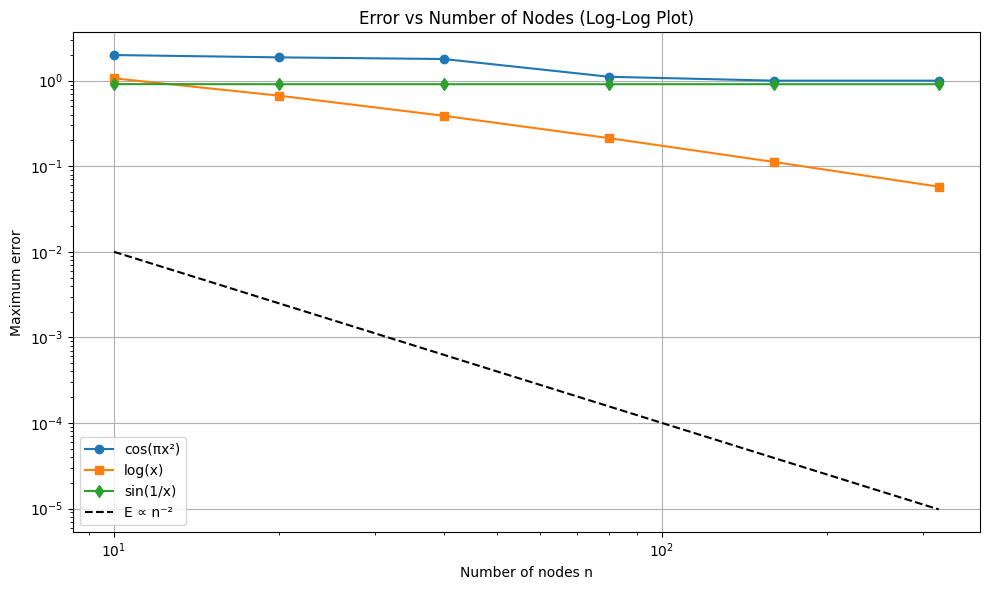

In [22]:
import matplotlib.pyplot as plt
import numpy as np


def hatfun(t, k):
    n = len(t) - 1

    def inner_function(x):
        if k < n and t[k] <= x <= t[k + 1]:
            return (x - t[k]) / (t[k + 1] - t[k])
        elif k < n - 1 and t[k + 1] <= x <= t[k + 2]:
            return (t[k + 2] - x) / (t[k + 2] - t[k + 1])
        else:
            return 0

    return inner_function


def plinterp(t, y):
    n = len(t)
    H = [hatfun(t, k) for k in range(n)]

    def interpolating_function(x):
        return sum(y[k] * H[k](x) for k in range(n))

    return interpolating_function


def func_a(x):
    return np.cos(np.pi * x**2)


def func_b(x):
    return np.log(x)


def func_c(x):
    return np.sin(1 / x)


# 不同的n值
n_values = [10, 20, 40, 80, 160, 320]

# 用于存储误差
errors_a = []
errors_b = []
errors_c = []

for n in n_values:
    # 对于函数a
    t_a = np.linspace(0, 4, n + 1)
    y_a = func_a(t_a)
    p_a = plinterp(t_a, y_a)
    x_vals_a = np.linspace(0, 4, 1600)
    f_a = func_a(x_vals_a)
    p_vals_a = np.array([p_a(x) for x in x_vals_a])
    error_a = np.max(np.abs(f_a - p_vals_a))
    errors_a.append(error_a)

    # 对于函数b
    t_b = np.linspace(1, 20, n + 1)
    y_b = func_b(t_b)
    p_b = plinterp(t_b, y_b)
    x_vals_b = np.linspace(1, 20, 1600)
    f_b = func_b(x_vals_b)
    p_vals_b = np.array([p_b(x) for x in x_vals_b])
    error_b = np.max(np.abs(f_b - p_vals_b))
    errors_b.append(error_b)

    # 对于函数c
    t_c = np.linspace(1 / 2, 7, n + 1)
    y_c = func_c(t_c)
    p_c = plinterp(t_c, y_c)
    x_vals_c = np.linspace(1 / 2, 7, 1600)
    f_c = func_c(x_vals_c)
    p_vals_c = np.array([p_c(x) for x in x_vals_c])
    error_c = np.max(np.abs(f_c - p_vals_c))
    errors_c.append(error_c)

# 绘制对数对数图
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors_a, "o-", label="cos(πx²)")
plt.loglog(n_values, errors_b, "s-", label="log(x)")
plt.loglog(n_values, errors_c, "d-", label="sin(1/x)")

# 添加理论误差线 E ∝ n^(-2)
C = 1
theoretical_errors = [C / (n**2) for n in n_values]
plt.loglog(n_values, theoretical_errors, "k--", label="E ∝ n⁻²")

plt.xlabel("Number of nodes n")
plt.ylabel("Maximum error")
plt.title("Error vs Number of Nodes (Log-Log Plot)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<>:87: SyntaxWarning: invalid escape sequence '\c'
<>:110: SyntaxWarning: invalid escape sequence '\c'
<>:137: SyntaxWarning: invalid escape sequence '\c'
<>:164: SyntaxWarning: invalid escape sequence '\c'
<>:87: SyntaxWarning: invalid escape sequence '\c'
<>:110: SyntaxWarning: invalid escape sequence '\c'
<>:137: SyntaxWarning: invalid escape sequence '\c'
<>:164: SyntaxWarning: invalid escape sequence '\c'
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\1172511806.py:87: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\1172511806.py:110: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\1172511806.py:137: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')
C:\Users

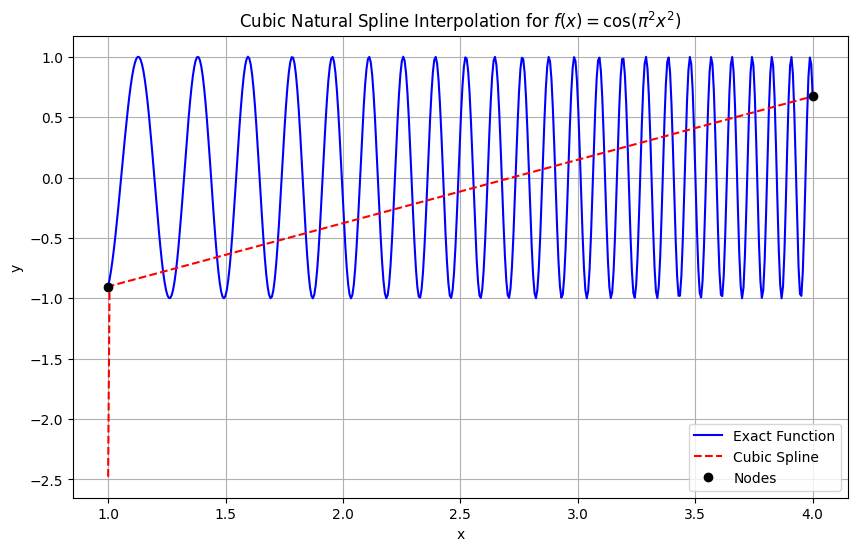

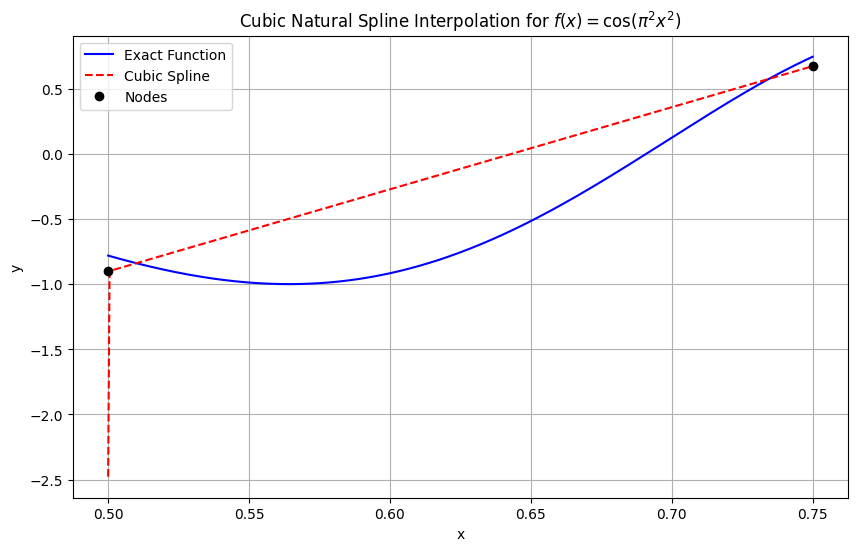

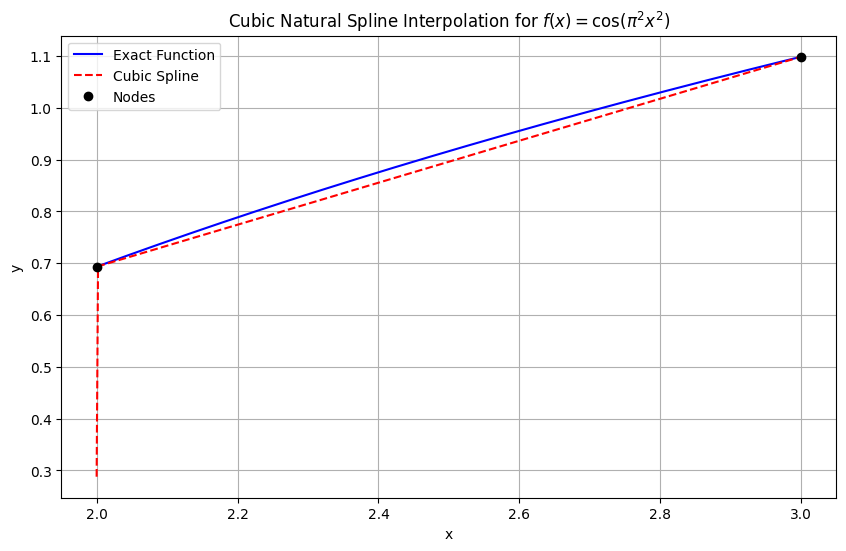

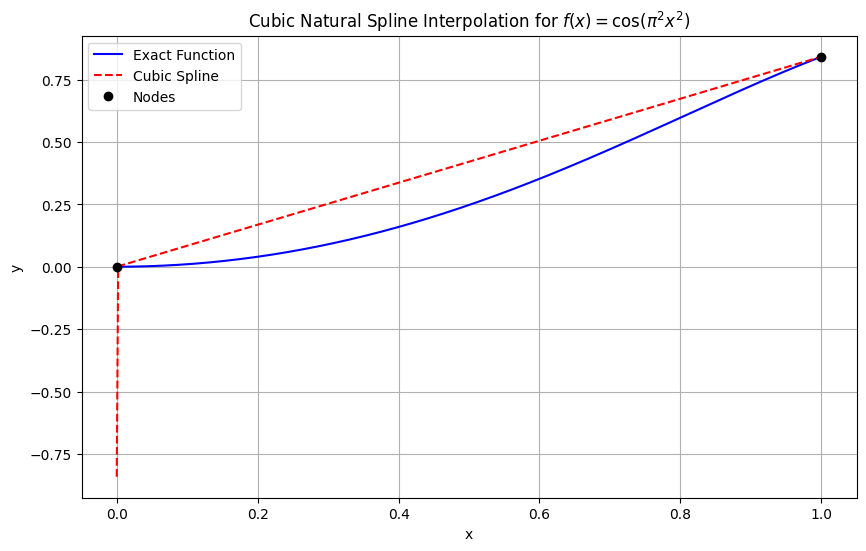

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial


def spinterp(t, y):
    """
    构造一个三次自然样条插值函数，用于插值给定点集 `t` 处的函数值 `y`。
    """
    n = len(t) - 1  # 区间数量（节点数减1）
    h = np.array([t[k + 1] - t[k] for k in range(n)])  # 各区间宽度

    # 预定义矩阵和变量
    Z = np.zeros((n, n))  # n×n零矩阵
    In = np.eye(n)  # n×n单位矩阵
    E = In[: n - 1, :]  # 截取前n-1行（用于连续性条件）
    J = np.diag(np.ones(n)) + np.diag(-np.ones(n - 1), k=1)  # 差分矩阵
    H = np.diag(h)  # 区间宽度对角矩阵

    # 左端点插值条件：每个区间左端点值等于给定数据
    AL = np.hstack([In, Z, Z, Z])  # 分块矩阵 [I, 0, 0, 0]
    vL = y[:n]  # 对应函数值

    # 右端点插值条件：每个区间右端点值等于给定数据
    AR = np.hstack([In, H, H @ H, H @ H @ H])  # 分块矩阵 [I, H, H², H³]
    vR = y[1 : n + 1]  # 对应函数值

    # 一阶导数连续性条件：相邻区间在节点处一阶导数相等
    A1 = E @ np.hstack([Z, J, 2 * H, 3 * H @ H])  # 分块矩阵约束一阶导数
    v1 = np.zeros(n - 1)

    # 二阶导数连续性条件：相邻区间在节点处二阶导数相等
    A2 = E @ np.hstack([Z, Z, J, 3 * H])  # 分块矩阵约束二阶导数
    v2 = np.zeros(n - 1)

    # 自然边界条件
    natural_left = np.zeros((1, 4 * n))
    natural_left[0, 2 * n] = 2  # 第一个区间的c系数（二阶导数的一半）

    natural_right = np.zeros((1, 4 * n))
    natural_right[0, 2 * n + (n - 1)] = 2  # 最后一个区间的c系数
    natural_right[0, 3 * n + (n - 1)] = 6 * h[-1]  # 最后一个区间的d系数乘以6h

    # 组装完整线性方程组
    A = np.vstack([AL, AR, A1, A2, natural_left, natural_right])
    v = np.hstack([vL, vR, v1, v2, 0, 0])  # 右侧向量

    # 求解线性系统
    z = np.linalg.solve(A, v)

    # 将解向量分解为各区间的多项式系数
    a = z[:n]  # 常数项系数
    b = z[n : 2 * n]  # 一次项系数
    c = z[2 * n : 3 * n]  # 二次项系数
    d = z[3 * n :]  # 三次项系数
    S = [Polynomial([a[k], b[k], c[k], d[k]]) for k in range(n)]  # 构建各区间多项式

    # 定义样条插值函数：根据输入x返回插值结果
    def spline_evaluator(x):
        if x < t[0] or x > t[-1]:  # 超出插值区间则返回NaN
            return np.nan
        else:
            k = np.searchsorted(t, x) - 1  # 找到x所在区间的索引
            return S[k](x - t[k])  # 计算对应多项式在x处的值

    return spline_evaluator  # 返回样条插值函数对象


# (a)
def f1(x):
    return np.cos(np.pi**2 * x**2)


# 定义节点
t1 = np.array([1, 4])
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(1, 4, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
# b()
t2 = np.array([1 / 2, 3 / 4])
y2 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t2, y2)

# 生成绘图点
x_plot = np.linspace(1 / 2, 3 / 4, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t2, y2, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (c)
def f1(x):
    return np.log(x)


# 定义节点
t1 = np.array([2, 3])
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(2, 3, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (d)
def f1(x):
    return np.sin(x**2)


# 定义节点
t1 = np.array([0, 1])
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(0, 1, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


<>:87: SyntaxWarning: invalid escape sequence '\c'
<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:141: SyntaxWarning: invalid escape sequence '\c'
<>:87: SyntaxWarning: invalid escape sequence '\c'
<>:114: SyntaxWarning: invalid escape sequence '\c'
<>:141: SyntaxWarning: invalid escape sequence '\c'
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\2922239066.py:87: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\2922239066.py:114: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_46940\2922239066.py:141: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$')


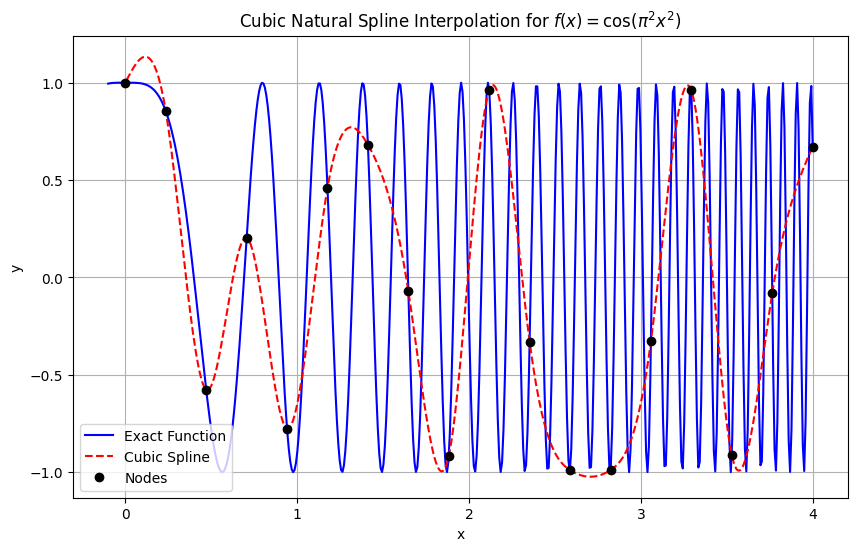

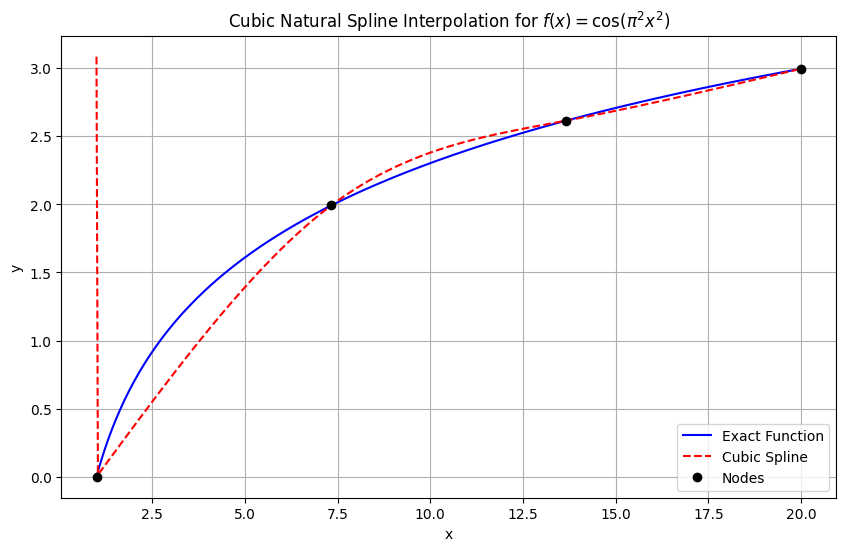

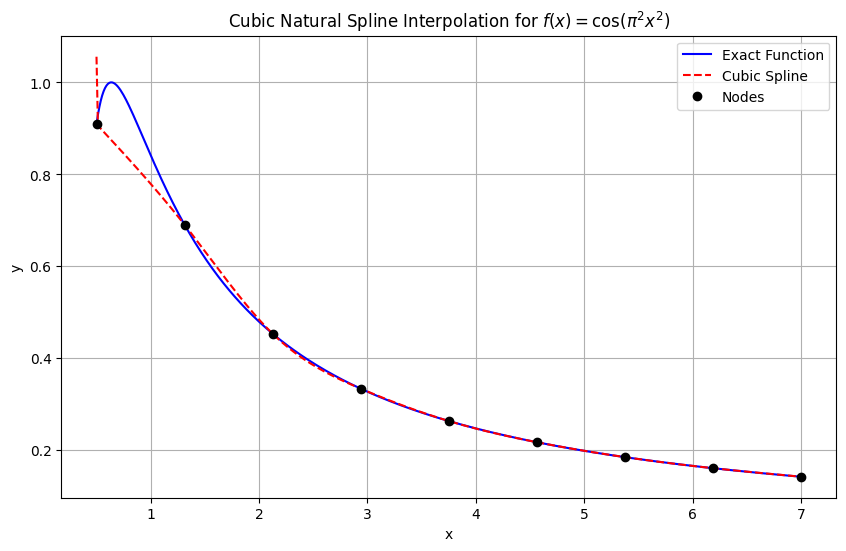

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial


def spinterp(t, y):
    """
    构造一个三次自然样条插值函数，用于插值给定点集 `t` 处的函数值 `y`。
    """
    n = len(t) - 1  # 区间数量（节点数减1）
    h = np.array([t[k + 1] - t[k] for k in range(n)])  # 各区间宽度

    # 预定义矩阵和变量
    Z = np.zeros((n, n))  # n×n零矩阵
    In = np.eye(n)  # n×n单位矩阵
    E = In[: n - 1, :]  # 截取前n-1行（用于连续性条件）
    J = np.diag(np.ones(n)) + np.diag(-np.ones(n - 1), k=1)  # 差分矩阵
    H = np.diag(h)  # 区间宽度对角矩阵

    # 左端点插值条件：每个区间左端点值等于给定数据
    AL = np.hstack([In, Z, Z, Z])  # 分块矩阵 [I, 0, 0, 0]
    vL = y[:n]  # 对应函数值

    # 右端点插值条件：每个区间右端点值等于给定数据
    AR = np.hstack([In, H, H @ H, H @ H @ H])  # 分块矩阵 [I, H, H², H³]
    vR = y[1 : n + 1]  # 对应函数值

    # 一阶导数连续性条件：相邻区间在节点处一阶导数相等
    A1 = E @ np.hstack([Z, J, 2 * H, 3 * H @ H])  # 分块矩阵约束一阶导数
    v1 = np.zeros(n - 1)

    # 二阶导数连续性条件：相邻区间在节点处二阶导数相等
    A2 = E @ np.hstack([Z, Z, J, 3 * H])  # 分块矩阵约束二阶导数
    v2 = np.zeros(n - 1)

    # 自然边界条件
    natural_left = np.zeros((1, 4 * n))
    natural_left[0, 2 * n] = 2  # 第一个区间的c系数（二阶导数的一半）

    natural_right = np.zeros((1, 4 * n))
    natural_right[0, 2 * n + (n - 1)] = 2  # 最后一个区间的c系数
    natural_right[0, 3 * n + (n - 1)] = 6 * h[-1]  # 最后一个区间的d系数乘以6h

    # 组装完整线性方程组
    A = np.vstack([AL, AR, A1, A2, natural_left, natural_right])
    v = np.hstack([vL, vR, v1, v2, 0, 0])  # 右侧向量

    # 求解线性系统
    z = np.linalg.solve(A, v)

    # 将解向量分解为各区间的多项式系数
    a = z[:n]  # 常数项系数
    b = z[n : 2 * n]  # 一次项系数
    c = z[2 * n : 3 * n]  # 二次项系数
    d = z[3 * n :]  # 三次项系数
    S = [Polynomial([a[k], b[k], c[k], d[k]]) for k in range(n)]  # 构建各区间多项式

    # 定义样条插值函数：根据输入x返回插值结果
    def spline_evaluator(x):
        if x < t[0] or x > t[-1]:  # 超出插值区间则返回NaN
            return np.nan
        else:
            k = np.searchsorted(t, x) - 1  # 找到x所在区间的索引
            return S[k](x - t[k])  # 计算对应多项式在x处的值

    return spline_evaluator  # 返回样条插值函数对象


# (a)
def f1(x):
    return np.cos(np.pi**2 * x**2)


# 定义节点
t1 = np.linspace(0, 4, 18)
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(-0.1, 4, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (c)
def f1(x):
    return np.log(x)


# 定义节点
t1 = np.linspace(1, 20, 4)
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(1, 20, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# (d)
def f1(x):
    return np.sin(1 / x)


# 定义节点
t1 = np.linspace(1 / 2, 7, 9)
y1 = f1(t1)  # 计算节点处的函数值

# 使用spinterp函数构造样条插值函数
spline1 = spinterp(t1, y1)

# 生成绘图点
x_plot = np.linspace(1 / 2, 7, 500)
y_spline = np.array([spline1(x) for x in x_plot])
y_exact = f1(x_plot)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, "b-", label="Exact Function")
plt.plot(x_plot, y_spline, "r--", label="Cubic Spline")
plt.plot(t1, y1, "ko", label="Nodes")
plt.title("Cubic Natural Spline Interpolation for $f(x) = \cos(\pi^2 x^2)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


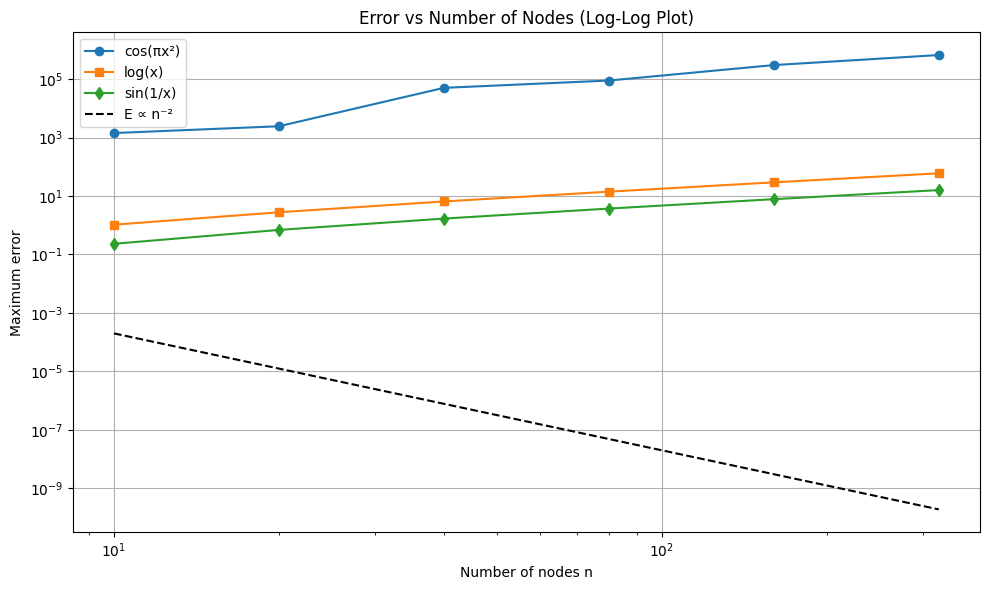

In [36]:
import matplotlib.pyplot as plt
import numpy as np


def spinterp(t, y):
    """
    构造一个三次自然样条插值函数，用于插值给定点集 `t` 处的函数值 `y`。
    """
    n = len(t) - 1  # 区间数量（节点数减1）
    h = np.array([t[k + 1] - t[k] for k in range(n)])  # 各区间宽度

    # 预定义矩阵和变量
    Z = np.zeros((n, n))  # n×n零矩阵
    In = np.eye(n)  # n×n单位矩阵
    E = In[: n - 1, :]  # 截取前n-1行（用于连续性条件）
    J = np.diag(np.ones(n)) + np.diag(-np.ones(n - 1), k=1)  # 差分矩阵
    H = np.diag(h)  # 区间宽度对角矩阵

    # 左端点插值条件：每个区间左端点值等于给定数据
    AL = np.hstack([In, Z, Z, Z])  # 分块矩阵 [I, 0, 0, 0]
    vL = y[:n]  # 对应函数值

    # 右端点插值条件：每个区间右端点值等于给定数据
    AR = np.hstack([In, H, H @ H, H @ H @ H])  # 分块矩阵 [I, H, H², H³]
    vR = y[1 : n + 1]  # 对应函数值

    # 一阶导数连续性条件：相邻区间在节点处一阶导数相等
    A1 = E @ np.hstack([Z, J, 2 * H, 3 * H @ H])  # 分块矩阵约束一阶导数
    v1 = np.zeros(n - 1)

    # 二阶导数连续性条件：相邻区间在节点处二阶导数相等
    A2 = E @ np.hstack([Z, Z, J, 3 * H])  # 分块矩阵约束二阶导数
    v2 = np.zeros(n - 1)

    # 自然边界条件
    natural_left = np.zeros((1, 4 * n))
    natural_left[0, 2 * n] = 2  # 第一个区间的c系数（二阶导数的一半）

    natural_right = np.zeros((1, 4 * n))
    natural_right[0, 2 * n + (n - 1)] = 2  # 最后一个区间的c系数
    natural_right[0, 3 * n + (n - 1)] = 6 * h[-1]  # 最后一个区间的d系数乘以6h

    # 组装完整线性方程组
    A = np.vstack([AL, AR, A1, A2, natural_left, natural_right])
    v = np.hstack([vL, vR, v1, v2, 0, 0])  # 右侧向量

    # 求解线性系统
    z = np.linalg.solve(A, v)

    # 将解向量分解为各区间的多项式系数
    a = z[:n]  # 常数项系数
    b = z[n : 2 * n]  # 一次项系数
    c = z[2 * n : 3 * n]  # 二次项系数
    d = z[3 * n :]  # 三次项系数
    S = [Polynomial([a[k], b[k], c[k], d[k]]) for k in range(n)]  # 构建各区间多项式

    # 定义样条插值函数：根据输入x返回插值结果
    def spline_evaluator(x):
        if x < t[0] or x > t[-1]:  # 超出插值区间则返回NaN
            return np.nan
        else:
            k = np.searchsorted(t, x) - 1  # 找到x所在区间的索引
            return S[k](x - t[k])  # 计算对应多项式在x处的值

    return spline_evaluator  # 返回样条插值函数对象


def func_a(x):
    return np.cos(np.pi * x**2)


def func_b(x):
    return np.log(x)


def func_c(x):
    return np.sin(1 / x)


# 不同的n值
n_values = [10, 20, 40, 80, 160, 320]

# 用于存储误差
errors_a = []
errors_b = []
errors_c = []

for n in n_values:
    # 对于函数a
    t_a = np.linspace(0, 4, n + 1)
    y_a = func_a(t_a)
    p_a = spinterp(t_a, y_a)
    x_vals_a = np.linspace(0, 4, 1600)
    f_a = func_a(x_vals_a)
    p_vals_a = np.array([p_a(x) for x in x_vals_a])
    error_a = np.max(np.abs(f_a - p_vals_a))
    errors_a.append(error_a)

    # 对于函数b
    t_b = np.linspace(1, 20, n + 1)
    y_b = func_b(t_b)
    p_b = spinterp(t_b, y_b)
    x_vals_b = np.linspace(1, 20, 1600)
    f_b = func_b(x_vals_b)
    p_vals_b = np.array([p_b(x) for x in x_vals_b])
    error_b = np.max(np.abs(f_b - p_vals_b))
    errors_b.append(error_b)

    # 对于函数c
    t_c = np.linspace(1 / 2, 7, n + 1)
    y_c = func_c(t_c)
    p_c = spinterp(t_c, y_c)
    x_vals_c = np.linspace(1 / 2, 7, 1600)
    f_c = func_c(x_vals_c)
    p_vals_c = np.array([p_c(x) for x in x_vals_c])
    error_c = np.max(np.abs(f_c - p_vals_c))
    errors_c.append(error_c)

# 绘制对数对数图
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors_a, "o-", label="cos(πx²)")
plt.loglog(n_values, errors_b, "s-", label="log(x)")
plt.loglog(n_values, errors_c, "d-", label="sin(1/x)")

# 添加理论误差线 E ∝ n^(-4)
C = 2
theoretical_errors = [C / (n**4) for n in n_values]
plt.loglog(n_values, theoretical_errors, "k--", label="E ∝ n⁻²")

plt.xlabel("Number of nodes n")
plt.ylabel("Maximum error")
plt.title("Error vs Number of Nodes (Log-Log Plot)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np


def fun(x):
    return np.sin(2 * x)


def erjie_zhongxin_caifen(f, x, h):
    """使用中心差分公式计算二阶导数"""
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)


t = [0.9, 1, 1.1]
h = 0.1
for i in t:
    print(erjie_zhongxin_caifen(fun, i, h))


-3.8824231889203467
-3.625081895357817
-3.223220026234785


In [2]:
import numpy as np


def fdweights(t, m):
    # 递归计算单个权重的内部函数
    def weight(t, m, r, k):
        # 输入参数说明：
        # t: 节点向量（索引从 0 开始）
        # m: 导数阶数
        # r: 使用的节点数-1（即从 t[0] 到 t[r] 共 r+1 个节点）
        # k: 当前计算权重的节点索引（0 <= k <= r）

        if m < 0 or m > r:
            return 0.0
        elif m == 0 and r == 0:
            return 1.0
        else:
            if k < r:
                term1 = t[r] * weight(t, m, r - 1, k)
                term2 = m * weight(t, m - 1, r - 1, k)
                denominator = t[r] - t[k]
                return (term1 - term2) / denominator
            else:
                # 递归情况 2：k == r（最后一个节点）
                if r > 1:
                    numer = 1.0
                    for x in t[
                        : r - 1
                    ]:  # t[1:r-1] 在 Julia 中对应 t[1] 到 t[r-1]（Python 为 t[0] 到 t[r-2]）
                        numer *= (
                            t[r - 1] - x
                        )  # t[r] 对应 Julia 中的 t[r+1]，此处应为 t[r-1]？
                else:
                    numer = 1.0
                if r > 0:
                    denom = 1.0
                    for x in t[
                        :r
                    ]:  # t[1:r] 在 Julia 中对应 t[1] 到 t[r]（Python 为 t[0] 到 t[r-1]）
                        denom *= t[r] - x
                else:
                    denom = 1.0
                beta = numer / denom
                term1 = m * weight(t, m - 1, r - 1, r - 1)
                term2 = t[r - 1] * weight(
                    t, m, r - 1, r - 1
                )  # t[r] 应为 t[r-1]（索引调整）
                return beta * (term1 - term2)

    n = len(t)
    if n == 0:
        return []
    r = n - 1  # 对应 Julia 中的 length(t)-1
    weights = [weight(t, m, r, k) for k in range(n)]
    return weights


def problem_3():
    f = lambda x: np.exp(-x)
    x = 0.5
    h = 0.2

    # 精确解
    exact = {1: -np.exp(-x), 2: np.exp(-x), 3: -np.exp(-x), 4: np.exp(-x)}

    # 近似解
    approx = {}

    # 使用 fdweights 函数计算各阶导数
    for order in range(1, 5):
        # 生成节点（相对于中心点的位置）
        if order == 1 or order == 2:
            # 3点公式
            t = [-h, 0, h]
        else:
            # 5点公式（更高阶导数需要更多点）
            t = [-2 * h, -h, 0, h, 2 * h]

        # 计算权重
        weights = fdweights(t, order)

        # 生成函数值
        if order == 1 or order == 2:
            f_values = [f(x - h), f(x), f(x + h)]
        else:
            f_values = [f(x - 2 * h), f(x - h), f(x), f(x + h), f(x + 2 * h)]

        # 计算导数近似值
        approx[order] = sum(w * f_val for w, f_val in zip(weights, f_values)) / (
            h**order
        )

    # 输出结果
    print("\n问题3:e^(-x) 在 x=0.5 处的各阶导数：")
    print("导数阶数\t近似值\t\t精确值\t\t误差")
    for order in range(1, 5):
        error = abs(approx[order] - exact[order])
        print(f"{order}\t\t{approx[order]:.6f}\t{exact[order]:.6f}\t{error:.6e}")


problem_3()


def problem_4():
    """求解问题4:不同长度中心节点向量的二阶导数权重"""
    print("\n问题4:不同长度中心节点向量的二阶导数权重：")

    # 对于 n=3,5,7,9 的中心节点向量
    for n in [3, 5, 7, 9]:
        # 生成节点位置（相对于中心点的位置）
        half_n = (n - 1) // 2
        nodes = np.arange(-half_n, half_n + 1)

        # 计算权重
        weights = fdweights(nodes, 2)  # 二阶导数

        # 输出结果
        print(f"\nn={n} 的中心节点向量权重：")
        print("节点位置:\t", nodes)
        print("对应权重:\t", np.round(weights, 6))


# 5.(a) 计算 tan(2x) 在 x=0.3 处的二阶导数
def problem_5_a():
    """求解问题5(a):tan(2x) 在 x=0.3 处的二阶导数"""
    f = lambda x: np.tan(2 * x)
    x = 0.3
    h = 0.05

    # 生成节点（相对于中心点的位置）
    t = [-2 * h, -h, 0, h, 2 * h]

    # 计算权重
    weights = fdweights(t, 2)  # 二阶导数

    # 生成节点位置和函数值
    t_values = [x + ti for ti in t]
    f_values = [f(ti) for ti in t_values]

    # 计算二阶导数近似值
    approx = sum(w * f_val for w, f_val in zip(weights, f_values)) / (h**2)

    # 精确解：f''(x) = 8 sec^2(2x) tan(2x)
    exact = 8 * (1 / np.cos(2 * x)) ** 2 * np.tan(2 * x)

    # 输出结果
    print("\n问题5(a):tan(2x) 在 x=0.3 处的二阶导数：")
    print("节点位置 (t_j):", np.round(t_values, 4))
    print("函数值 (f(t_j)):", np.round(f_values, 4))
    print(f"二阶导数近似值: {approx:.6f}")
    print(f"二阶导数精确值: {exact:.6f}")
    print(f"误差: {abs(approx - exact):.6e}")


# 5.(b) 计算 tan(2x) 在 x=0.75 处的二阶导数
def problem_5_b():
    """求解问题5(b):tan(2x) 在 x=0.75 处的二阶导数"""
    f = lambda x: np.tan(2 * x)
    x = 0.75
    h = 0.05

    # 生成节点（相对于中心点的位置）
    t = [-2 * h, -h, 0, h, 2 * h]

    # 计算权重
    weights = fdweights(t, 2)  # 二阶导数

    # 生成节点位置和函数值
    t_values = [x + ti for ti in t]
    f_values = [f(ti) for ti in t_values]

    # 计算二阶导数近似值
    approx = sum(w * f_val for w, f_val in zip(weights, f_values)) / (h**2)

    # 精确解：f''(x) = 8 sec^2(2x) tan(2x)
    exact = 8 * (1 / np.cos(2 * x)) ** 2 * np.tan(2 * x)

    # 输出结果
    print("\n问题5(b):tan(2x) 在 x=0.75 处的二阶导数：")
    print("节点位置 (t_j):", np.round(t_values, 4))
    print("函数值 (f(t_j)):", np.round(f_values, 4))
    print(f"二阶导数近似值: {approx:.6f}")
    print(f"二阶导数精确值: {exact:.6f}")
    print(f"误差: {abs(approx - exact):.6e}")


problem_4()
problem_5_a()
problem_5_b()



问题3:e^(-x) 在 x=0.5 处的各阶导数：
导数阶数	近似值		精确值		误差
1		-3.052911	-0.606531	2.446381e+00
2		15.213878	0.606531	1.460735e+01
3		-76.577535	-0.606531	7.597100e+01
4		381.616469	0.606531	3.810099e+02

问题4:不同长度中心节点向量的二阶导数权重：

n=3 的中心节点向量权重：
节点位置:	 [-1  0  1]
对应权重:	 [ 1. -2.  1.]

n=5 的中心节点向量权重：
节点位置:	 [-2 -1  0  1  2]
对应权重:	 [-0.083333  1.333333 -2.5       1.333333 -0.083333]

n=7 的中心节点向量权重：
节点位置:	 [-3 -2 -1  0  1  2  3]
对应权重:	 [ 0.011111 -0.15      1.5      -2.722222  1.5      -0.15      0.011111]

n=9 的中心节点向量权重：
节点位置:	 [-4 -3 -2 -1  0  1  2  3  4]
对应权重:	 [-1.786000e-03  2.539700e-02 -2.000000e-01  1.600000e+00 -2.847222e+00
  1.600000e+00 -2.000000e-01  2.539700e-02 -1.786000e-03]

问题5(a):tan(2x) 在 x=0.3 处的二阶导数：
节点位置 (t_j): [0.2  0.25 0.3  0.35 0.4 ]
函数值 (f(t_j)): [0.4228 0.5463 0.6841 0.8423 1.0296]
二阶导数近似值: 3212.238652
二阶导数精确值: 8.034739
误差: 3.204204e+03

问题5(b):tan(2x) 在 x=0.75 处的二阶导数：
节点位置 (t_j): [0.65 0.7  0.75 0.8  0.85]
函数值 (f(t_j)): [  3.6021   5.7979  14.1014 -34.2325  -7.6966]
二阶导数近似值: